In [348]:
import requests, bs4
import pandas as pd
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

In [349]:
xmlUrl = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent'

My_API_Key = unquote('KQZ6DQ%2Fo3Gs1pgnDcApKZrjqEg6uFbEBkvvMU7etcv%2BQIfnqNJMwatp4b5dmilJue7GHx%2Fjp1kVGodxLpLzZrQ%3D%3D')
queryParams = '?' + urlencode(    
    {
        quote_plus('ServiceKey') : My_API_Key,    # 필수 항목 1 : 서비스키 (본인의 서비스키)
        quote_plus('LAWD_CD') : '11110',          # 필수 항목 2 : 지역코드 (법정코드목록조회에서 확인)
        quote_plus('DEAL_YMD') : '201912'         # 픽수 항목 3 : 계약월
     }
)

response = requests.get(xmlUrl + queryParams).text.encode('utf-8')
xmlobj = bs4.BeautifulSoup(response, 'lxml-xml')


In [350]:
rows = xmlobj.findAll('item')

In [351]:
columns =rows[0].find_all()

In [352]:
columns

[<건축년도>2008</건축년도>,
 <년>2019</년>,
 <법정동> 사직동</법정동>,
 <보증금액>     3,000</보증금액>,
 <아파트>광화문풍림스페이스본(101동~105동)</아파트>,
 <월>12</월>,
 <월세금액>       350</월세금액>,
 <일>5</일>,
 <전용면적>151.81</전용면적>,
 <지번>9</지번>,
 <지역코드>11110</지역코드>,
 <층>6</층>]

In [353]:
columnsLen = len(columns)

In [354]:
columnsLen

12

In [355]:
rowList = []
nameList = []
columnList = []

rowsLen = len(rows)
for i in range(0, rowsLen):
    columns = rows[i].find_all()
    
    columnsLen = len(columns)
    for j in range(0, columnsLen):
        if i == 0:
            nameList.append(columns[j].name)
        eachColumn = columns[j].text
        columnList.append(eachColumn)
    rowList.append(columnList)
    columnList = []
    
result = pd.DataFrame(rowList, columns=nameList)
result

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2008,2019,사직동,"3,000",광화문풍림스페이스본(101동~105동),12,350,5,151.81,9,11110,6
1,2008,2019,사직동,"47,000",광화문풍림스페이스본(101동~105동),12,160,5,126.34,9,11110,3
2,2008,2019,사직동,"30,000",광화문풍림스페이스본(101동~105동),12,150,6,94.51,9,11110,5
3,2008,2019,사직동,"55,000",광화문풍림스페이스본(101동~105동),12,155,6,151.81,9,11110,8
4,2008,2019,사직동,"75,000",광화문풍림스페이스본(101동~105동),12,0,11,94.51,9,11110,4
...,...,...,...,...,...,...,...,...,...,...,...,...
178,2008,2019,무악동,"53,000",인왕산아이파크,12,0,27,59.993,60,11110,4
179,2000,2019,무악동,"50,000",현대,12,0,30,84.92,82,11110,5
180,2000,2019,무악동,"65,000",현대,12,0,31,114.9,82,11110,8
181,2008,2019,무악동,"7,000",인왕산아이파크,12,150,31,84.858,60,11110,3


In [357]:
adress = pd.read_csv('address.txt',sep='\t', encoding='cp949')
adress

,법정동코드,법정동명,폐지여부
0,1100000000,서울특별시,존재
1,1111000000,서울특별시 종로구,존재
2,1111010100,서울특별시 종로구 청운동,존재
3,1111010200,서울특별시 종로구 신교동,존재
4,1111010300,서울특별시 종로구 궁정동,존재
...,...,...,...
46223,5013032022,제주특별자치도 서귀포시 표선면 하천리,존재
46224,5013032023,제주특별자치도 서귀포시 표선면 성읍리,존재
46225,5013032024,제주특별자치도 서귀포시 표선면 가시리,존재
46226,5013032025,제주특별자치도 서귀포시 표선면 세화리,존재


In [358]:
adress = pd.read_csv('adress.csv',encoding='cp949')

In [359]:
lenAdress = len(adress)

In [360]:
for i in range(1,250) :
    xmlUrl = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent'

    My_API_Key = unquote('KQZ6DQ%2Fo3Gs1pgnDcApKZrjqEg6uFbEBkvvMU7etcv%2BQIfnqNJMwatp4b5dmilJue7GHx%2Fjp1kVGodxLpLzZrQ%3D%3D')
    queryParams = '?' + urlencode(    
        {
            quote_plus('ServiceKey') : My_API_Key,         # 필수 항목 1 : 서비스키 (본인의 서비스키)
            quote_plus('LAWD_CD') : adress['gu_code'][i],  # 필수 항목 2 : 지역코드 (법정코드목록조회에서 확인)
            quote_plus('DEAL_YMD') : '201912'              # 픽수 항목 3 : 계약월
         }
    )

    response = requests.get(xmlUrl + queryParams).text.encode('utf-8')
    xmlobj = bs4.BeautifulSoup(response, 'lxml-xml')
    
    rows = xmlobj.findAll('item')

    rowList = []
    nameList = []
    columnList = []

    rowsLen = len(rows)
    for i in range(0, rowsLen):
        columns = rows[i].find_all()

        columnsLen = len(columns)
        for j in range(0, columnsLen):
            if i == 0:
                nameList.append(columns[j].name)
            eachColumn = columns[j].text
            columnList.append(eachColumn)
        rowList.append(columnList)
        columnList = []

    result1 = pd.DataFrame(rowList, columns=nameList)
    result = pd.concat([result, result1])

   


In [347]:
result

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2008,2019,사직동,"3,000",광화문풍림스페이스본(101동~105동),12,350,5,151.81,9,11110,6
1,2008,2019,사직동,"47,000",광화문풍림스페이스본(101동~105동),12,160,5,126.34,9,11110,3
2,2008,2019,사직동,"30,000",광화문풍림스페이스본(101동~105동),12,150,6,94.51,9,11110,5
3,2008,2019,사직동,"55,000",광화문풍림스페이스본(101동~105동),12,155,6,151.81,9,11110,8
4,2008,2019,사직동,"75,000",광화문풍림스페이스본(101동~105동),12,0,11,94.51,9,11110,4
...,...,...,...,...,...,...,...,...,...,...,...,...
238,2018,2019,만리동2가,"68,000",서울역한라비발디센트럴,12,0,14,84.9774,288,11140,3
239,2018,2019,만리동2가,"69,000",서울역한라비발디센트럴,12,0,21,84.9728,288,11140,7
240,2018,2019,만리동2가,"68,000",서울역한라비발디센트럴,12,0,21,84.9774,288,11140,5
241,2018,2019,만리동2가,"69,000",서울역한라비발디센트럴,12,0,28,84.9728,288,11140,7


In [308]:
result.describe()

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
count,183,183,183,183,183,183,183,183,183,183,183,183
unique,26,1,20,74,46,1,36,29,72,46,1,22
top,2017,2019,행촌동,"10,213",경희궁자이(1단지),12,0,24,39.0561,211,11110,3
freq,76,183,35,15,35,183,94,24,35,35,183,15


In [328]:
result['전용면적당_월세'] = (result['보증금액']*10000*0.05+result['월세금액'])/result['전용면적']*100

In [327]:
result = result.astype({'보증금액':'int','월세금액':'int','전용면적':'int'})

In [320]:
result['보증금액'].str.strip()

0       3000
1      47000
2      30000
3      55000
4      75000
       ...  
178    53000
179    50000
180    39000
181    65000
182     7000
Name: 보증금액, Length: 183, dtype: object

In [319]:
result['보증금액']=result['보증금액'].str.replace(',','')

In [326]:
result['전용면적']=result['전용면적'].str.replace('.','')

In [329]:
result

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층,전용면적당_월세
0,2008,2019,사직동,3000,광화문풍림스페이스본(101동~105동),12,350,5,15181,9,11110,6,9.883078e+03
1,2008,2019,사직동,47000,광화문풍림스페이스본(101동~105동),12,160,5,12634,9,11110,3,1.860073e+05
2,2008,2019,사직동,30000,광화문풍림스페이스본(101동~105동),12,150,6,9451,9,11110,5,1.587150e+05
3,2008,2019,사직동,55000,광화문풍림스페이스본(101동~105동),12,155,6,15181,9,11110,8,1.811485e+05
4,2008,2019,사직동,75000,광화문풍림스페이스본(101동~105동),12,0,11,9451,9,11110,4,3.967834e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2008,2019,무악동,53000,인왕산아이파크,12,0,27,59993,60,11110,4,4.417182e+04
179,2000,2019,무악동,50000,현대,12,0,30,8492,82,11110,5,2.943947e+05
180,2000,2019,무악동,39000,현대,12,0,31,60,82,11110,4,3.250000e+07
181,2000,2019,무악동,65000,현대,12,0,31,1149,82,11110,8,2.828547e+06


In [330]:
import matplotlib.pyplot as plt

In [331]:
plt.rcParams['font.family']="AppleGothic"

In [334]:
mean_of_dong_rent = result.groupby('법정동').mean()['전용면적당_월세'].sort_values(ascending=False)

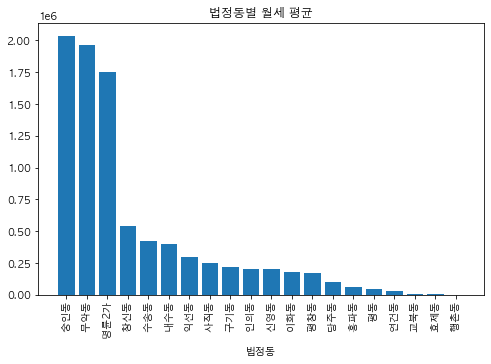

In [337]:
plt.figure(figsize=(8,5)) 
plt.bar(mean_of_dong_rent.index, mean_of_dong_rent) 
plt.title('법정동별 월세 평균') 
plt.xticks(rotation = 90)
plt.xlabel('법정동')
plt.show()

In [361]:
result

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2008,2019,사직동,"3,000",광화문풍림스페이스본(101동~105동),12,350,5,151.81,9,11110,6
1,2008,2019,사직동,"47,000",광화문풍림스페이스본(101동~105동),12,160,5,126.34,9,11110,3
2,2008,2019,사직동,"30,000",광화문풍림스페이스본(101동~105동),12,150,6,94.51,9,11110,5
3,2008,2019,사직동,"55,000",광화문풍림스페이스본(101동~105동),12,155,6,151.81,9,11110,8
4,2008,2019,사직동,"75,000",광화문풍림스페이스본(101동~105동),12,0,11,94.51,9,11110,4
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020,2019,성산읍 고성리,"2,125",서귀포성산엘에이치아파트,12,22,3,46.65,1141-1,50130,2
80,2001,2019,성산읍 고성리,"6,000","진우파크빌(101,102동)",12,0,6,49.4367,1618-1,50130,4
81,1991,2019,성산읍 고성리,"9,700",동명,12,0,10,70.86,1132-21,50130,3
82,2017,2019,안덕면 화순리,"15,000",서귀포화순코아루푸르나임,12,0,18,84.9455,2133,50130,1


In [362]:
result = result.reset_index(drop=True)
result

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2008,2019,사직동,"3,000",광화문풍림스페이스본(101동~105동),12,350,5,151.81,9,11110,6
1,2008,2019,사직동,"47,000",광화문풍림스페이스본(101동~105동),12,160,5,126.34,9,11110,3
2,2008,2019,사직동,"30,000",광화문풍림스페이스본(101동~105동),12,150,6,94.51,9,11110,5
3,2008,2019,사직동,"55,000",광화문풍림스페이스본(101동~105동),12,155,6,151.81,9,11110,8
4,2008,2019,사직동,"75,000",광화문풍림스페이스본(101동~105동),12,0,11,94.51,9,11110,4
...,...,...,...,...,...,...,...,...,...,...,...,...
77547,2020,2019,성산읍 고성리,"2,125",서귀포성산엘에이치아파트,12,22,3,46.65,1141-1,50130,2
77548,2001,2019,성산읍 고성리,"6,000","진우파크빌(101,102동)",12,0,6,49.4367,1618-1,50130,4
77549,1991,2019,성산읍 고성리,"9,700",동명,12,0,10,70.86,1132-21,50130,3
77550,2017,2019,안덕면 화순리,"15,000",서귀포화순코아루푸르나임,12,0,18,84.9455,2133,50130,1


In [364]:
result.describe()

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
count,77552,77552,77552,77552,77552,77552,77552,77552,77552,77552,77552,77528
unique,55,1,2211,4090,13870,1,208,31,13705,7456,251,66
top,2019,2019,장지동,"1,000",위례포레샤인23단지,12,0,21,84.99,905,11710,4
freq,5860,77552,836,2487,656,77552,51753,3801,1002,703,2244,5357


In [374]:
result['보증금액'].str.strip()
result['보증금액']=result['보증금액'].str.replace(',','')
result['전용면적']=result['전용면적'].str.replace('.','')

AttributeError: Can only use .str accessor with string values!

In [377]:
result = result.astype({'보증금액':'int','월세금액':'int','전용면적':'int'})

In [376]:
result['월세금액']=result['월세금액'].str.replace(',','')

In [378]:
result

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2008,2019,사직동,3000,광화문풍림스페이스본(101동~105동),12,350,5,15181,9,11110,6
1,2008,2019,사직동,47000,광화문풍림스페이스본(101동~105동),12,160,5,12634,9,11110,3
2,2008,2019,사직동,30000,광화문풍림스페이스본(101동~105동),12,150,6,9451,9,11110,5
3,2008,2019,사직동,55000,광화문풍림스페이스본(101동~105동),12,155,6,15181,9,11110,8
4,2008,2019,사직동,75000,광화문풍림스페이스본(101동~105동),12,0,11,9451,9,11110,4
...,...,...,...,...,...,...,...,...,...,...,...,...
77547,2020,2019,성산읍 고성리,2125,서귀포성산엘에이치아파트,12,22,3,4665,1141-1,50130,2
77548,2001,2019,성산읍 고성리,6000,"진우파크빌(101,102동)",12,0,6,494367,1618-1,50130,4
77549,1991,2019,성산읍 고성리,9700,동명,12,0,10,7086,1132-21,50130,3
77550,2017,2019,안덕면 화순리,15000,서귀포화순코아루푸르나임,12,0,18,849455,2133,50130,1


In [379]:
result['전용면적당_월세'] = (result['보증금액']*10000*0.05+result['월세금액'])/result['전용면적']*100

In [385]:
mean_of_dong_rent = result.groupby('법정동').mean()['전용면적당_월세'].sort_values(ascending=False)

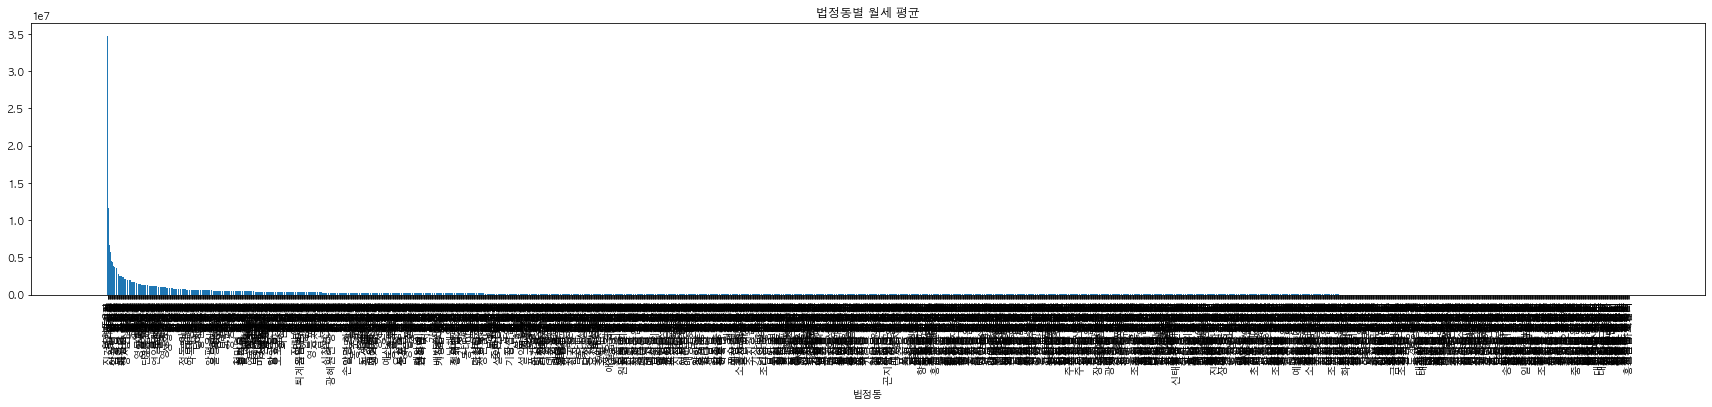

In [382]:
plt.figure(figsize=(30,5)) 
plt.bar(mean_of_dong_rent.index, mean_of_dong_rent) 
plt.title('법정동별 월세 평균') 
plt.xticks(rotation = 90)
plt.xlabel('법정동')
plt.show()

In [384]:
mean_of_code_rent = result.groupby('지역코드').mean()['전용면적당_월세'].sort_values(ascending=False)

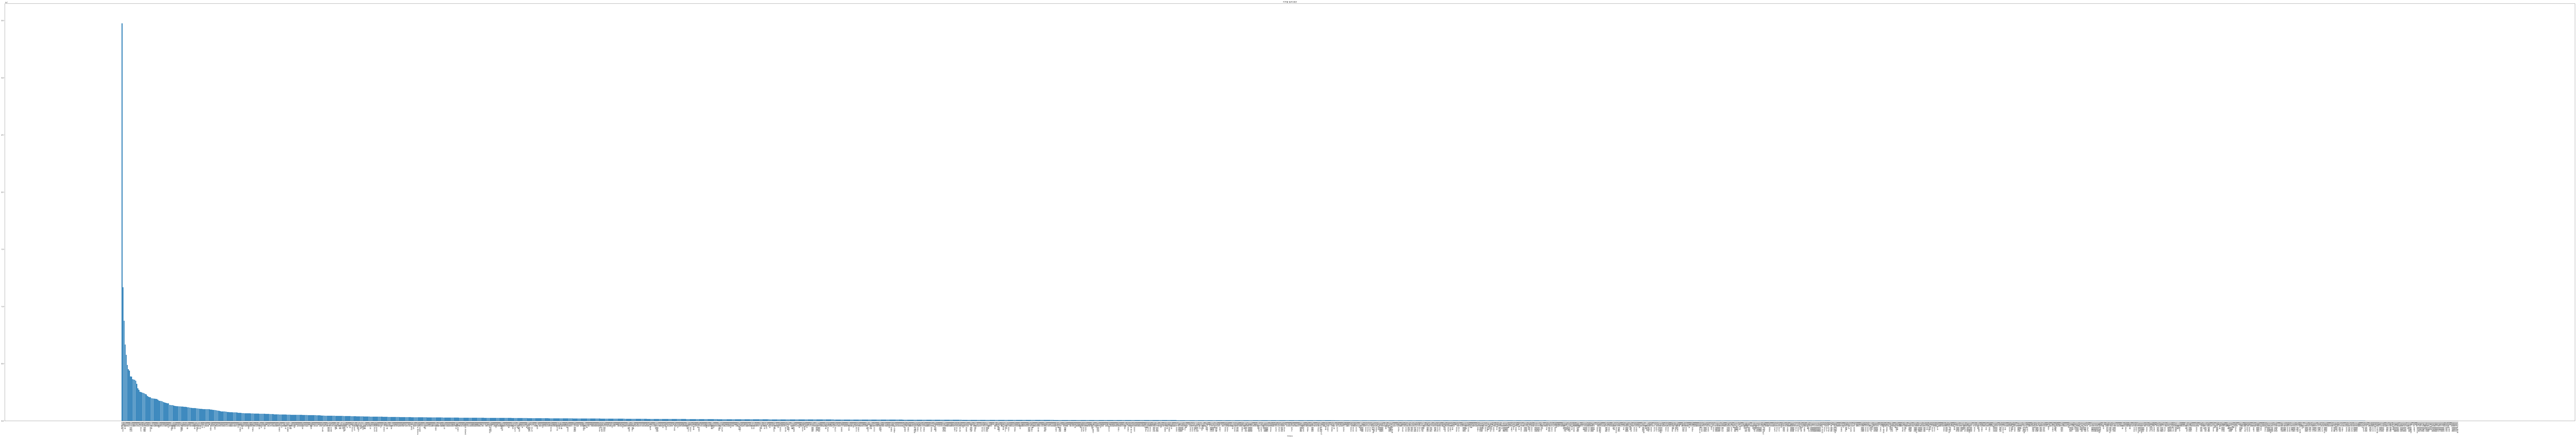

In [389]:
plt.figure(figsize=(300,50)) 
plt.bar(mean_of_dong_rent.index, mean_of_dong_rent) 
plt.title('지역별 월세 평균') 
plt.xticks(rotation = 90)
plt.xlabel('지역코드')
plt.show()

In [396]:
result['법정동'].str.strip()

0            사직동
1            사직동
2            사직동
3            사직동
4            사직동
          ...   
77547    성산읍 고성리
77548    성산읍 고성리
77549    성산읍 고성리
77550    안덕면 화순리
77551    안덕면 화순리
Name: 법정동, Length: 77552, dtype: object

In [406]:
result

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층,전용면적당_월세
0,2008,2019,사직동,3000,광화문풍림스페이스본(101동~105동),12,350,5,15181,9,11110,6,9883.077531
1,2008,2019,사직동,47000,광화문풍림스페이스본(101동~105동),12,160,5,12634,9,11110,3,186007.281938
2,2008,2019,사직동,30000,광화문풍림스페이스본(101동~105동),12,150,6,9451,9,11110,5,158714.950799
3,2008,2019,사직동,55000,광화문풍림스페이스본(101동~105동),12,155,6,15181,9,11110,8,181148.508003
4,2008,2019,사직동,75000,광화문풍림스페이스본(101동~105동),12,0,11,9451,9,11110,4,396783.409163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77547,2020,2019,성산읍 고성리,2125,서귀포성산엘에이치아파트,12,22,3,4665,1141-1,50130,2,22776.463023
77548,2001,2019,성산읍 고성리,6000,"진우파크빌(101,102동)",12,0,6,494367,1618-1,50130,4,606.836621
77549,1991,2019,성산읍 고성리,9700,동명,12,0,10,7086,1132-21,50130,3,68444.820773
77550,2017,2019,안덕면 화순리,15000,서귀포화순코아루푸르나임,12,0,18,849455,2133,50130,1,882.919048


In [408]:
result1

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2017,2019,법환동,200,탐라해오름,12,40,7,17.335,744-7,50130,5
1,2017,2019,법환동,200,탐라해오름,12,40,8,20.155,744-7,50130,4
2,2016,2019,서호동,"23,100",서귀포혁신사랑으로부영아파트,12,0,2,84.3616,1534,50130,13
3,2016,2019,서호동,"23,100",서귀포혁신사랑으로부영아파트,12,0,4,84.3616,1534,50130,1
4,2017,2019,호근동,"20,000",호근동 코아루 오션뷰,12,0,5,84.9237,2161,50130,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020,2019,성산읍 고성리,"2,125",서귀포성산엘에이치아파트,12,22,3,46.65,1141-1,50130,2
80,2001,2019,성산읍 고성리,"6,000","진우파크빌(101,102동)",12,0,6,49.4367,1618-1,50130,4
81,1991,2019,성산읍 고성리,"9,700",동명,12,0,10,70.86,1132-21,50130,3
82,2017,2019,안덕면 화순리,"15,000",서귀포화순코아루푸르나임,12,0,18,84.9455,2133,50130,1
